<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/ESAA_HW_5_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(파이썬 딥러닝 텐서플로)
# PART 03. 케라스(Keras)
## 04. 모델 세부 설정


In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()  # max: 255
x_test = x_test / x_test.max()     # max: 255

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


### 4-1 초기값 설정
레이어의 초기화 방법을 다르게 설정할 수 있다
* Dense 레이어는 기본 초기화 방법으로 Glorot Uniform 초기화 방법이 설정되어 있다



In [ ]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

* 기본값인 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서는 kernel_initializer 매개변수에 설정하면 된다

In [ ]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


* 자주 사용하는 초기화 목록 종류 : glorot_normal, lecun_normal, he_normal, random_normal

### 4-2 규제(Regularization)
모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 함
* 기본값으로 kernel_regularizer 설정이 None으로 설정되어 있음

In [ ]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [ ]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


### 4-3 드롭아웃(Dropout)
모델의 과대적합 문제를 해결하기 위해 노드의 일부 신호를 임의로 삭제함
* 중요한 점은 훈련할 때는 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용됨

In [ ]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화(Batch Normalization)
각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화  
다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련 가능, 성능 크게 향상시킬 수 있음

In [ ]:
# Model A : Dense + ReLU (배치정규화 X 모델)
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model B : Dense + BatchNorm + ReLU (배치정규화 O 모델)
model_b = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

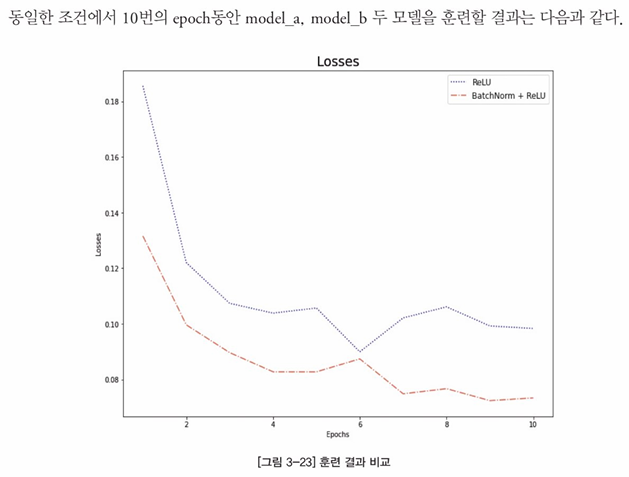  
* 배치 정규화만 추가해도 손실은 이전 대비 더 안정적이고 빠르게 수렴하는 것을 확인할 수 있다

### 4-5 활성화(activation) 함수
ReLU 외에도 케라스가 지원하는 다른 활성화 함수를 적용해볼 수 있다

In [ ]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

* 모델에는 다음과 같이 적용할 수 있다

In [ ]:
# Model C : Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),

          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),

          tf.keras.layers.Dense(10, activation='softmax')
])
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

* 앞에서 생성한 3개의 모델의 수렴 속도를 비교한다

In [ ]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs=10)

# Model B : Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs=10)

# Model C : Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.3000 - accuracy: 0.9124 - val_loss: 0.1727 - val_accuracy: 0.9470
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1373 - accuracy: 0.9592 - val_loss: 0.1301 - val_accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1024 - accuracy: 0.9689 - val_loss: 0.1089 - val_accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9748 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0690 - accuracy: 0.9783 - val_loss: 0.1078 - val_accuracy: 0.9687
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576 - accuracy: 0.9819 - val_loss: 0.0972 - val_accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.1012 - val_accuracy

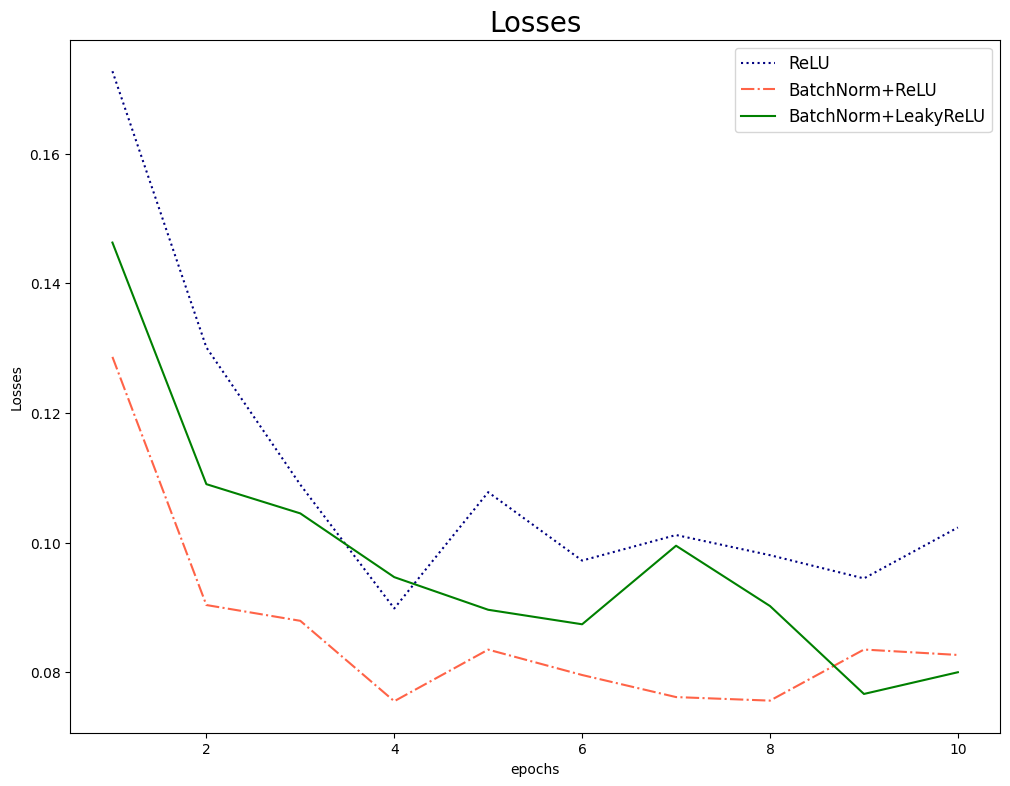

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

## 06. 모델 저장 및 불러오기
### 6-1 모델을 파일로 저장
save() 메소드를 사용하여 저장
* 형식은 HDF5 포맷, SavedModel 포맷 두가지가 있다  
* .h5 확장자를 포함하는 경우는 모델이 HDF5(Hierarchical Data Format) 포맷으로 저장, 대용량의 데이터를 저장하기 위한 파일 형식이다

In [ ]:
# 모델을 h5 포맷으로 저장
model_c.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 6-2 저장된 모델 복원
tensorflow.keras.models.load_model() 메소드로 저장된 모델을 복원할 수 있다

In [ ]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

* 복원한 모델을 evaluate 함수로 검증하여 복원이 잘 되었는지 확인한다

In [ ]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.07999, acc: 0.97510


* .h5 확장자를 생략하면 SavedModel 포맷으로 저장되며 텐서플로2에서 기본으로 지원하는 파일 포맷이다. 복원은 위와 같은 방식으로 복원하면 된다

In [ ]:
# 모델을 SavedModel 포맷으로 저장
model_c.save('saved-model')

In [ ]:
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

* SavedModel 형식도 HDF5 형식으로 저장 및 복원된 모델과 동일한 성능을 나타낸다

In [ ]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.07999, acc: 0.97510
saved_model] loss: 0.07999, acc: 0.97510


## 07. 복잡한 모델 생성
### 7-1 함수형 API(Functional API)
함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다  
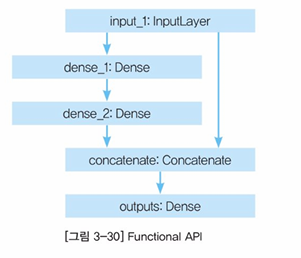  
* 입력 매개변수를 여러 개 갖는 다중 입력, return 값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능하다

함수형 API를 사용하기 위해서는 먼저 Input 레이어를 정의하고, 레이어마다 출력값을 변수에 저장한 뒤 다음 레이어의 입력으로 변환한다

In [ ]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

* 지정한 name은 summary에 함께 출력된다

In [ ]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 복잡한 구조를 갖는 모델은 케라스의 유틸 패키지에서 제공하는 plot_model 모듈을 활용하여 구조도를 시각화할 수 있다
* show_shapes=True는 입출력 shape를 출력하고, show_layer_names=True는 레이어의 이름을 출력한다
* to_file에 파일명을 입력하면 이미지로 저장도 가능하다

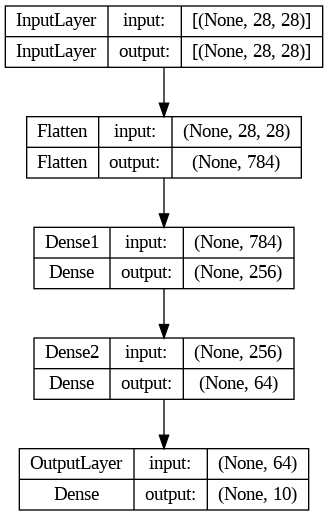

In [ ]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

* 함수형 API 모델도 Sequential과 동일한 방법으로 훈련할 수 있다

In [ ]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2162 - accuracy: 0.9354
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0913 - accuracy: 0.9719
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0622 - accuracy: 0.9802
Functional Model] loss: 0.07846, acc: 0.97620


### 7-2 모델 서브클래싱(Model Subclassing)
클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있다  
하지만 객체지향이나 클래스에 대한 개념이 부족하다면 성능 차이는 크게 없으므로 Sequential과 Functional API로 충분하다
* tf.keras.Model을 상속받아 생성하고자 하는 모델 클래스를 구현한다
* \_\_init\_\_() 함수에 레이어를 정의하고 레이어의 하이퍼파라미터를 정의한다

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # mothod overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

* call() 함수는 fit() 메소드가 호출되어 훈련하는 경우 호출될 함수이다
* call() 함수 내부에는 모델의 입력부터 출력까지의 순전파 흐름을 정의한다

In [ ]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 모델 이름을 부여하고 싶다면 모델의 _name 인스턴스에 지정할 수 있다
* 모델 Input을 정의한 후에 summary가 가능하다

In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.3f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2132 - accuracy: 0.9366
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0869 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0598 - accuracy: 0.9806
Subclassing Model] loss: 0.07749, acc: 0.974


* Sequential, 함수형 API와 같이 Model Subclassing으로 생성한 모델도 compile(), fit(), evaluate() 메소드를 사용하면 된다

### 7-3 서브클래싱 모델 파라미터를 활용한 생성
Model Subclassig의 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다

In [ ]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  # mothod overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

* 모델 생성할때 원하는 파라미터값을 입력해준다

In [ ]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.3f}')

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0492 - accuracy: 0.9842
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0359 - accuracy: 0.9883
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0296 - accuracy: 0.9899
Subclassing Model w.parameters] loss: 0.07929, acc: 0.979
